Extraido de [Tutorial de OpenCV](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html)

Este código se basa en opencv, también estas operaciones morfológicas se encuentran en la librería [scikit-image](https://scikit-image.org/docs/dev/api/skimage.morphology.html).

#Operaciones Morfológicas con imágenes binarias

Las dos operaciones morfológicas básicas son la erosión y la dilatación, a partir de estas se pueden aplicar las operaciones de apertura y cierre, estas operaciones son usualmente utilizadas para eliminar ruido en imágenes binarias.

Para realizar una operación morfológica de erosión o dilatación con OpenCV requerimos un elemento estructurante, el resultado de la operación dependerá de la forma y tamaño de este elemento, para generarlo en OpenCV usamos la función cv::getStructuringElement(MORPH_RECT, Size(5, 5)) donde el primer parámetro define la forma, puede ser: MORPH_RECT, MORPH_CROSS y MORPH_ELLIPSE, el segundo parámetro define el tamaño.

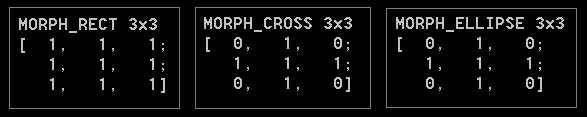

En la imagen podemos ver la matriz usada como elemento estructural en sus tres formas diferentes, todas son de tamaño 3x3 pero lo podemos cambiar si deseamos.

In [ ]:
!wget https://www.dropbox.com/s/g3wwldskqfdw4hj/jota.png

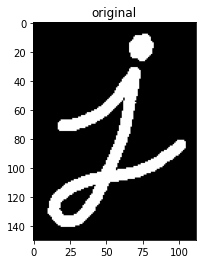

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('jota.png',0)
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


## Dilatación

Al aplicar esta operación sobre una imagen obtendremos el efecto de expandir o ampliar la región de la imagen que estemos trabajando, para aplicar la operación de dilatación con OpenCV usaremos la función` cv::dilate(src, dst, kernel).`

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
#plt.imshow(dilation,cmap='gray')
#plt.title('dilation')
#plt.show()

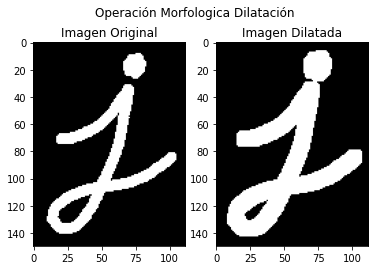

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Operación Morfologica Dilatación')
ax1.imshow(img,cmap='gray')
ax1.set_title("Imagen Original")
ax2.set_title("Imagen Dilatada")
ax2.imshow(dilation,cmap='gray')

Puedes variar la forma y tamaño del elemento estructurante para observar los distintos resultados que puedes obtener al realizar la dilatación.

## Erosion

Al aplicar la operación morfológica de erosión obtenemos el efecto de adelgazamiento del área que compone la imagen, podemos verlo como el inverso de la dilatación, para aplicar esta operación con OpenCV usaremos la función `cv::erode(src, dst, kernel)`.

In [ ]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)
#plt.imshow(erosion,cmap='gray')
#plt.title('erosion')
#plt.show()


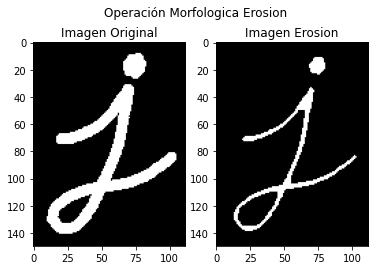

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Operación Morfologica Erosion')
ax1.imshow(img,cmap='gray')
ax1.set_title("Imagen Original")
ax2.set_title("Imagen Erosion")
ax2.imshow(erosion,cmap='gray')

Al igual que, con la operación anterior, te recomiendo variar el tamaño y forma del elemento estructurante para poder apreciar los distintos resultados.

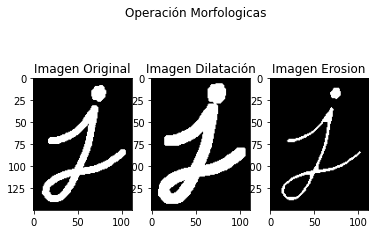

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.suptitle('Operación Morfologicas')
ax1.set_title("Imagen Original")
ax1.imshow(img,cmap='gray')
ax2.set_title("Imagen Dilatación")
ax2.imshow(dilation,cmap='gray')
ax3.set_title("Imagen Erosion")
ax3.imshow(erosion,cmap='gray')

## Opening

Estas operaciones morfológicas las utilizamos comúnmente para la eliminación de ruido y simplificación de formas, entre otras cosas.

La operación de apertura es el resultado de aplicar una erosión y después una dilatación, nos servirá para eliminar ruido que se encuentre fuera de la estructura, para aplicarla usaremos `MORPH_OPEN`.

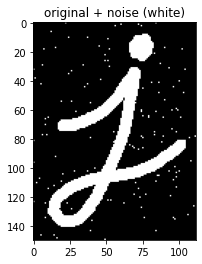

In [ ]:
(N,M) = img.shape

img_noise = img.copy()
#add ruido Sal y Pimienta 
for i in range(N):
  for j in range(M):
    if np.random.rand()>0.99:
      img_noise[i,j] = 255

plt.imshow(img_noise,cmap='gray')
plt.title('original + noise (white)')
plt.show()

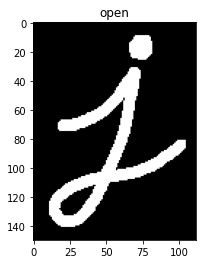

In [ ]:
opening = cv2.morphologyEx(img_noise, cv2.MORPH_OPEN, kernel)
plt.imshow(opening,cmap='gray')
plt.title('open')
plt.show()

Podemos aumentar el tamaño del elemento estructurante para eliminar marcas de ruido mas grandes, también podemos  cambiar el número de iteraciones.

## Closing

La operación de cierre se obtiene aplicando una dilatación y luego una erosión, el inverso del anterior, nos servirá para limpiar la figura, es decir eliminar el ruido interno de la misma, la aplicamos usando `MORPH_CLOSE` de la siguiente manera.

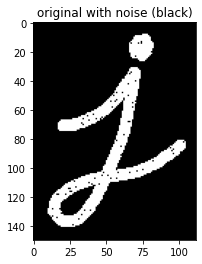

In [ ]:
(N,M) = img.shape

img_noise = img.copy()
#add ruido Sal y Pimienta 
for i in range(N):
  for j in range(M):
    if np.random.rand()>0.97:
      img_noise[i,j] = 0

plt.imshow(img_noise,cmap='gray')
plt.title('original with noise (black)')
plt.show()

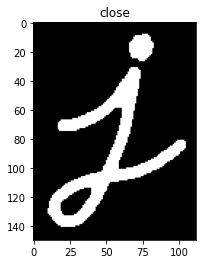

In [ ]:
closing = cv2.morphologyEx(img_noise, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='gray')
plt.title('close')
plt.show()

Aun existen otras operaciones morfológicas disponibles en la enumeración `cv::MorphTypes` puedes probar cada una de ellas y ver los resultados que obtienes.

## Fill holes - Relleno

In [ ]:
def fillhole(input_image):
    '''
    input gray binary image  get the filled image by floodfill method
    Note: only holes surrounded in the connected regions will be filled.
    :param input_image:
    :return:
    from https://www.programcreek.com/python/example/89425/cv2.floodFill
    '''
    im_flood_fill = input_image.copy()
    h, w = input_image.shape[:2]
    mask = np.zeros((h + 2, w + 2), np.uint8)
    im_flood_fill = im_flood_fill.astype("uint8")
    cv2.floodFill(im_flood_fill, mask, (0, 0), 255)
    im_flood_fill_inv = cv2.bitwise_not(im_flood_fill)
    img_out = input_image | im_flood_fill_inv
    return img_out

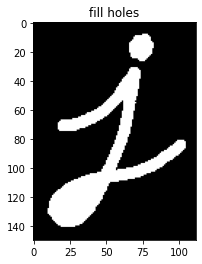

In [ ]:
im_fill = fillhole(img)

plt.imshow(im_fill,cmap='gray')
plt.title('fill holes')
plt.show()


## Skeletization

By [N. Reddy](https://medium.com/analytics-vidhya/skeletonization-in-python-using-opencv-b7fa16867331)

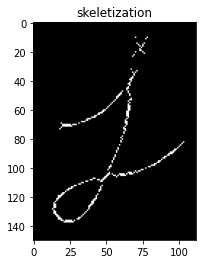

In [ ]:

# Step 1: Create an empty skeleton
size = np.size(img)
skel = np.zeros(img.shape, np.uint8)

# Get a Cross Shaped Kernel
element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Repeat steps 2-4
while True:
    #Step 2: Open the image
    open = cv2.morphologyEx(img, cv2.MORPH_OPEN, element)
    #Step 3: Substract open from the original image
    temp = cv2.subtract(img, open)
    #Step 4: Erode the original image and refine the skeleton
    eroded = cv2.erode(img, element)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
    # Step 5: If there are no white pixels left ie.. the image has been completely eroded, quit the loop
    if cv2.countNonZero(img)==0:
        break

plt.imshow(skel,cmap='gray')
plt.title('skeletization')
plt.show()


## Gradiente morfológico

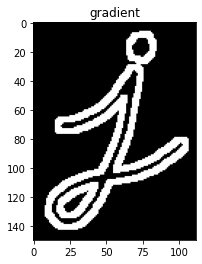

In [ ]:
img = cv2.imread('jota.png',0)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.imshow(gradient,cmap='gray')
plt.title('gradient')
plt.show()

# Operaciones morfológicas con imágenes en tonos de gris

In [ ]:
!wget https://www.dropbox.com/s/eja9kqyig1j3y73/tazmania.png

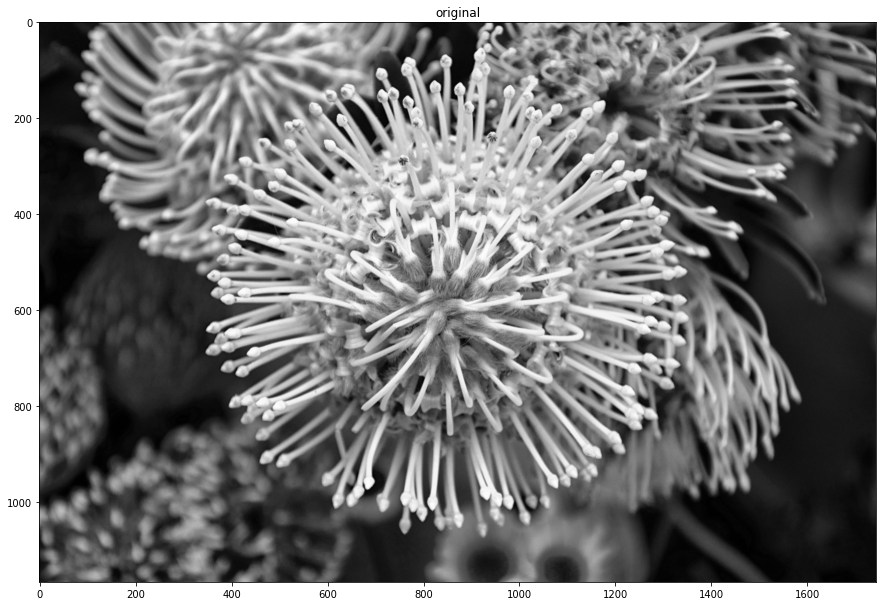

In [ ]:
img = cv2.imread('tazmania.png',0)
plt.figure(figsize=(15,18))
plt.imshow(img,cmap='gray')
plt.title('original')
plt.show()


In [ ]:
n = 7
kernel = np.ones((n,n),np.uint8)

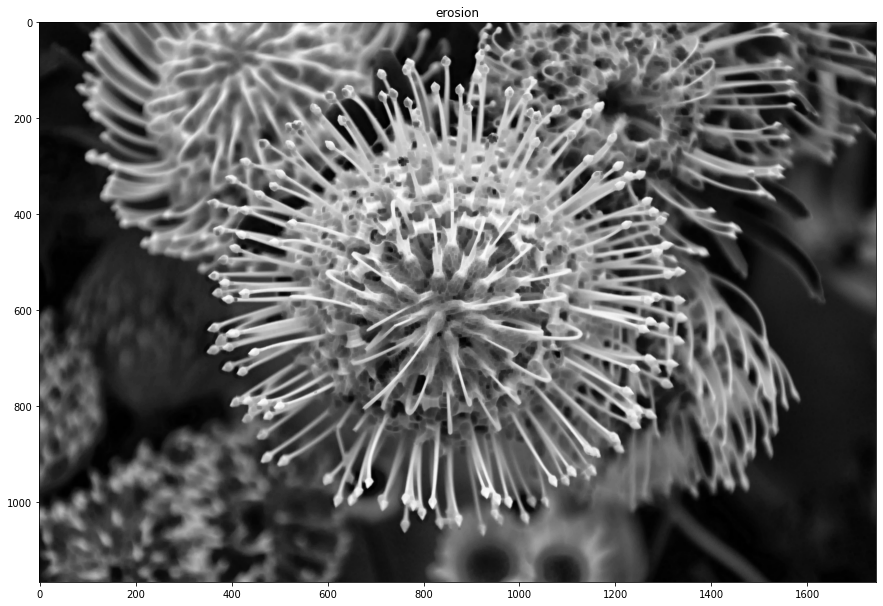

In [ ]:
erosion = cv2.erode(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(erosion,cmap='gray')
plt.title('erosion')
plt.show()


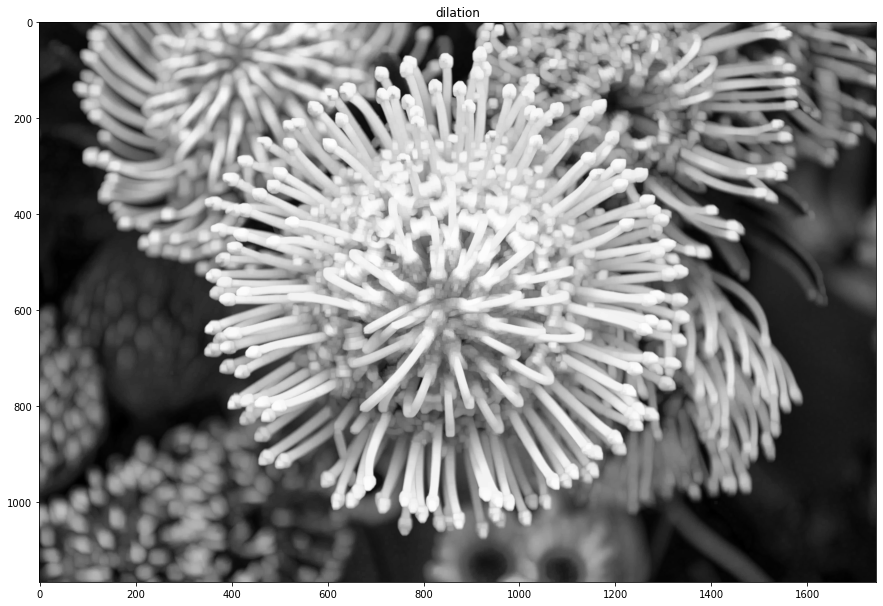

In [ ]:
dilation = cv2.dilate(img,kernel,iterations = 1)
plt.figure(figsize=(15,18))
plt.imshow(dilation,cmap='gray')
plt.title('dilation')
plt.show()


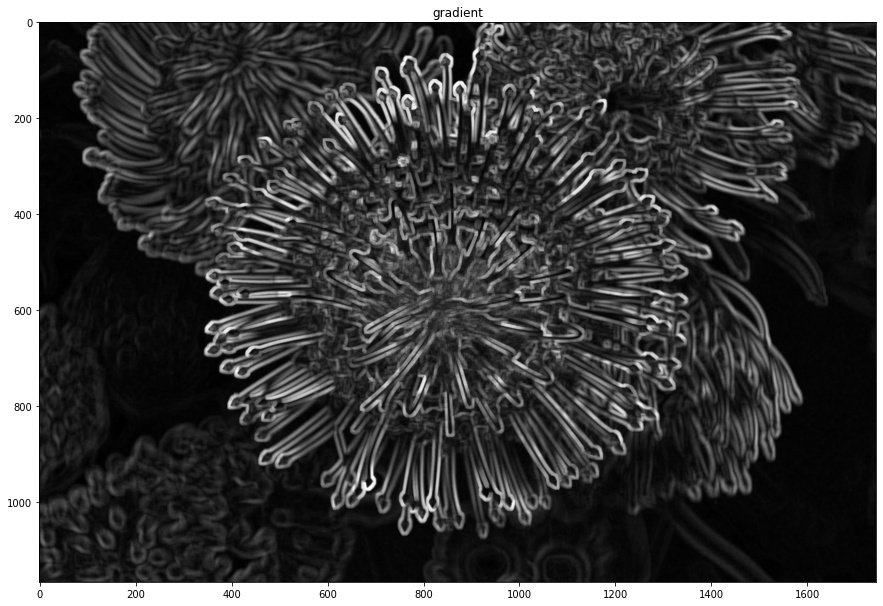

In [ ]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(15,18))
plt.imshow(gradient,cmap='gray')
plt.title('gradient')
plt.show()